In [68]:
##############################################################
import sys
path = "C:\\Users\\Paul Valcke\\Documents\\GitHub\\GEMMES" 
sys.path.insert(0, path)
import pygemmes as pgm
import numpy as np

from itables import init_notebook_mode
import itables.options as opt
init_notebook_mode(all_interactive=True)
%matplotlib widget

from IPython.display import display,HTML,Markdown
from IPython.display import IFrame

opt.columnDefs = [{"className": "dt-left", "targets": "_all"}]
opt.classes="display nowrap compact"
opt.scrollY="400px"
opt.scrollCollapse=True
opt.paging=False
##############################################################

<IPython.core.display.Javascript object>

In [ ]:
hub=pgm.Hub('reduced_GK_FRED',preset='FredValues')
hub.set_dparam(**{'dt':0.01})
hub.run()
pgm.plots.XYZ(hub,'employment','omega','debt')
display(*hub.get_summary())

# LOADING ECHIMES

In [ ]:
pgm.get_available_models()

In [ ]:
Markdown(pgm.get_available_model_documentation('CHIMES'))

In [ ]:
hub=pgm.Hub('CHIMES0',preset='SimpleTri',verb=True)
hub.set_dparam(**{'Tmax':10,'dt':0.01})
hub.run()
hub.plot()

In [ ]:
display(*hub.get_summary())

In [ ]:
hub.get_fieldsproperties()

In [ ]:
R=hub.dparam['nu0']
R

In [ ]:
#plt.close('all')
sectors = hub.dparam['Nprod']['list']
for sector in sectors :
    pgm.plots.plotnyaxis(hub, y=[[['inflation', sector],
                                  ['inflationMarkup', sector],
                                  ['inflationdotV', sector], ],
                                 [['dotV',sector]],
                                 [['c',sector],
                                  ['p',sector]],
                                 [['pi',sector],
                                  ['kappa',sector]],
                                 [['employment',sector],
                                  ['u',sector],
                                  ]],)
    pgm.plots.repartition(hub,
                          ['pi','omega','Mxi','Mgamma','rd','reloverinvest','reldotv'],
                          sign= [1,1,1,1,1,1,-1],
                          sector=sector,
                          title=f'Expected relative budget $\pi$ for sector {sector}')
    pgm.plots.repartition(hub,['Minter','Minvest','C','dotV'],
                          ref='Y',
                          sector=sector,
                          title=f'Physical Fluxes for sector {sector}')
    pgm.plots.repartition(hub,['MtransactY','MtransactI','wL','pC','rD'],
                          sign=[1, 1, 1, -1, 1],
                          ref='dotD',
                          sector=sector,
                          title=f'Monetary Fluxes for sector {sector}',
                          removetranspose=True)

In [ ]:
sectors = hub.dparam['Nprod']['list']
pgm.plots.plotnyaxis(hub,y=[#['employmentAGG']+[['employment',sector] for sector in sectors],
                            [['omega',sector] for sector in sectors],
                            [['pi',sector] for sector in sectors],
                            [['gamma',sector] for sector in sectors],
                            [['xi',sector] for sector in sectors],
                            [['rd',sector] for sector in sectors],
                            #[['inflation',sector] for sector in sectors],
                            #[['d',sector] for sector in sectors],
                            ],
                            tini=40,
                            tend=50,
                            title='All',
                            loc='upper left')

In [ ]:


for sector in sectors:
    pgm.plots.plotnyaxis(hub,y=[[['inflation', sector],
                                ['inflationMarkup', sector],
                                ['inflationdotV', sector], ],
                                [['dotV',sector]],
                                [['V',sector]],
                                #[['u',sector]],
                                ],
                                tini=80,tend=100,
                                title=sector)

In [ ]:
hub=pgm.Hub('CHIMES0')
hub.set_preset('SimpleTri')
hub.run()


In [ ]:
hub.run()

# STARTING AS A GOODWIN

In [32]:
hub=pgm.Hub('CHIMES0',verb=False)
GOODWIN_PRESET= { 
    ###
    'Tmax':100, 
    'Tini':0, 
    'dt': 0.1, 
    'Nprod': [''], 
    'nx': [''], 
    'nr': [''],

    'alpha':0.025, 
    'n':0.02, 
    'delta':0.005, 

    'gammai':0,
    'r':0.03, 
    'phinull':0.1, 

    'Xi': 1, 
    'Gamma': 0.1, 
    'sigma': 1, 
    'z' :1, 
    'b' :1, 
    'nu0': 3, 
    'eta': 0, 
    'mu0': 1, 
    'chi': 0, 
    'Cpond': 1, 
    'Delta': 0, 
    'philinConst': -0.292, 
    'philinSlope':  0.469, 
    #'phinull':0.1,
    'k0':0,
    'k1':1,

    'D':0, 
    'Dh':0, 
    'V':1, 
    'K':2, 
    'p':1, 
    'w0':0.75, 
    'u0':1, 
    'a0':3, 
    'N':1, 

    'z':1,
    'b':.5,
    'Cpond':1,

    'A': 1/3,
    'CESexp':10000,
}
hub.set_dparam(**GOODWIN_PRESET,verb=False)
hub.run(verb=False)
#display(*hub.get_summary())

C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\Core\_model_CHIMES0.py:167: RuntimeWarning: invalid value encountered in power
  _LOGICS['statevar']['l'] = {'func': lambda omegacarac, CESexp: np.maximum(0,(omegacarac**(-CESexp/(1+CESexp)) - 1)**(1/CESexp)),


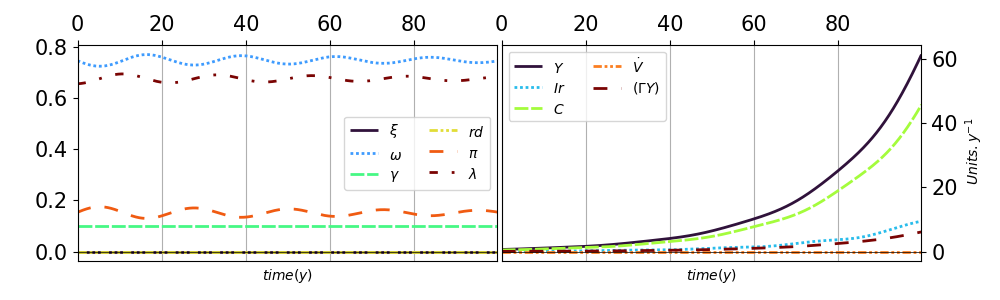

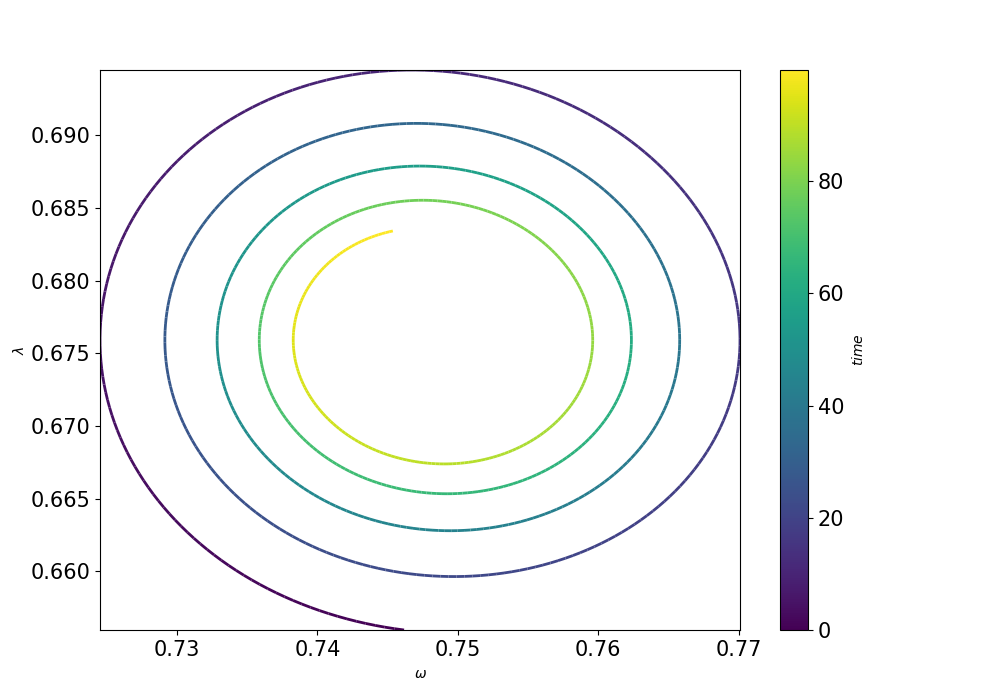

In [31]:
import matplotlib.pyplot as plt
plt.close('all')
hub.plot(filters_key=['employment','omega','gamma','xi','rd','pi',
                      'C','Ir','Y','GammaY','dotV']) #
pgm.plots.XY(hub,'omega','employment',color='time')

## Injecting Inflation

In [33]:
hub=pgm.Hub('CHIMES0',verb=False)
hub.set_dparam(**GOODWIN_PRESET,verb=False)
hub.set_dparam(**{'mu0':1.5,
                  'eta':0.1,
                  'CESexp':10000,
                  })
hub.run()

C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\Core\_model_CHIMES0.py:167: RuntimeWarning: invalid value encountered in power
  _LOGICS['statevar']['l'] = {'func': lambda omegacarac, CESexp: np.maximum(0,(omegacarac**(-CESexp/(1+CESexp)) - 1)**(1/CESexp)),



Changing Fields: ['mu0', 'eta', 'CESexp']
Identified mu0 as a value change on all axes
Identified eta as a value change on all axes
Identified CESexp as a value change on all axes

time step 603 / 1000
time step 1000 / 1000


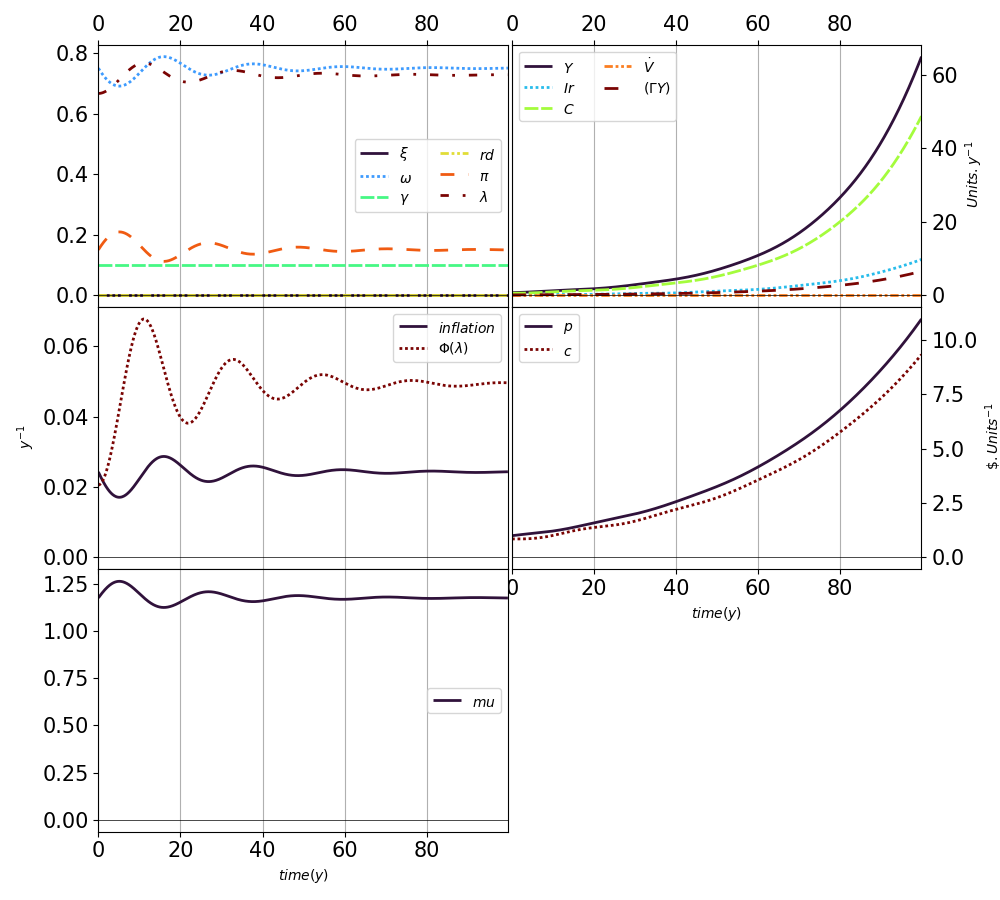

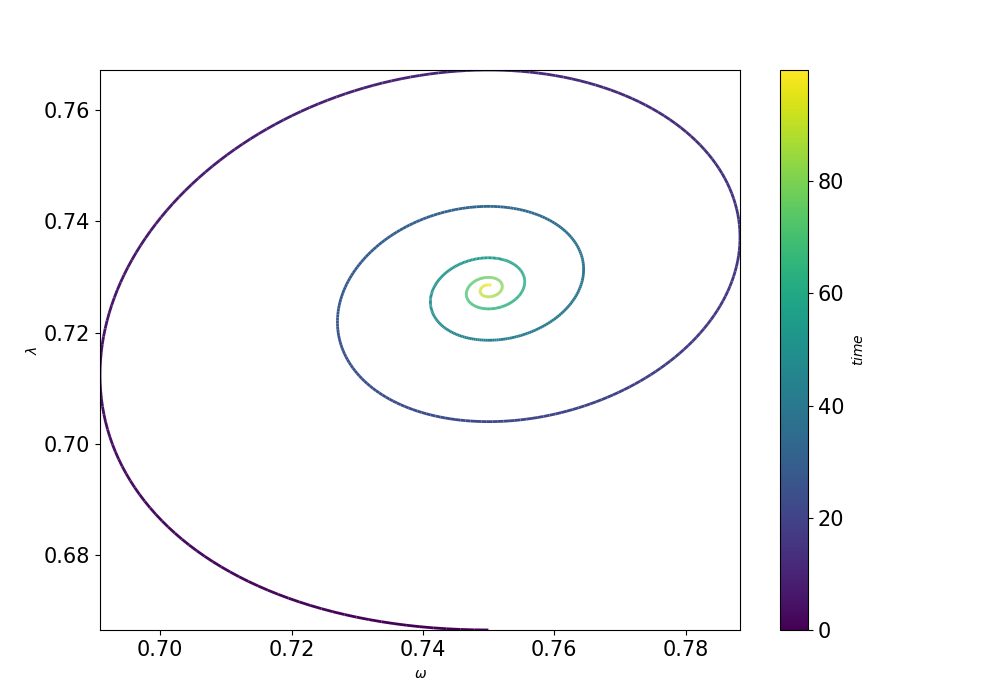

In [34]:
hub.plot(filters_key=['employment','omega','gamma','xi','rd','pi',
                      'C','Ir','Y','GammaY','dotV','p','c','inflation','mu','Phillips'],
         separate_variables={'':'mu'}) #
pgm.plots.XY(hub,'omega','employment',color='time')

# CES 


Changing Fields: ['CESexp', 'w0']
Identified w0 as a value change on all axes
Identified CESexp as a value change on all axes

time step 691 / 1000
time step 1000 / 1000


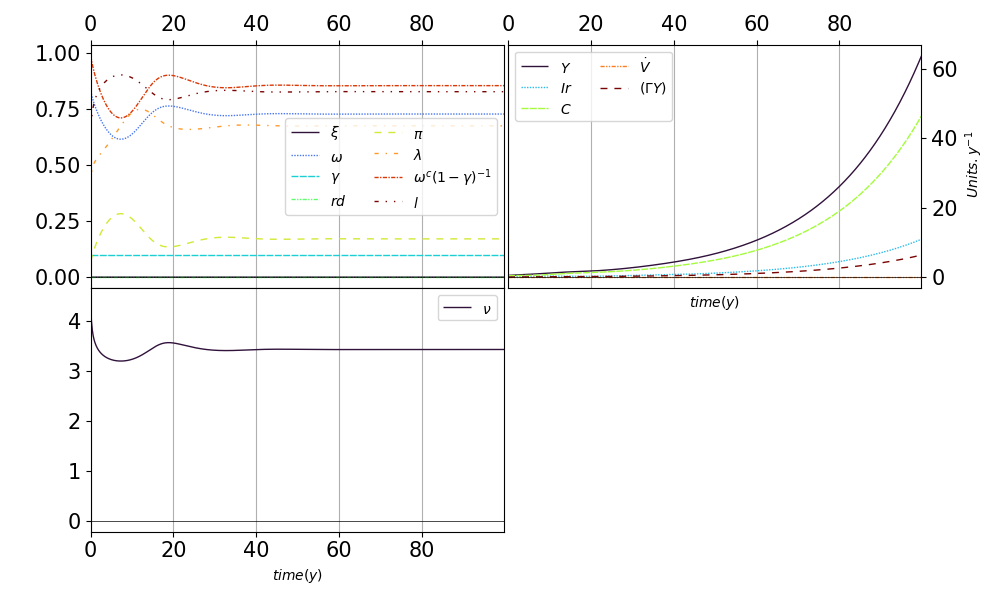

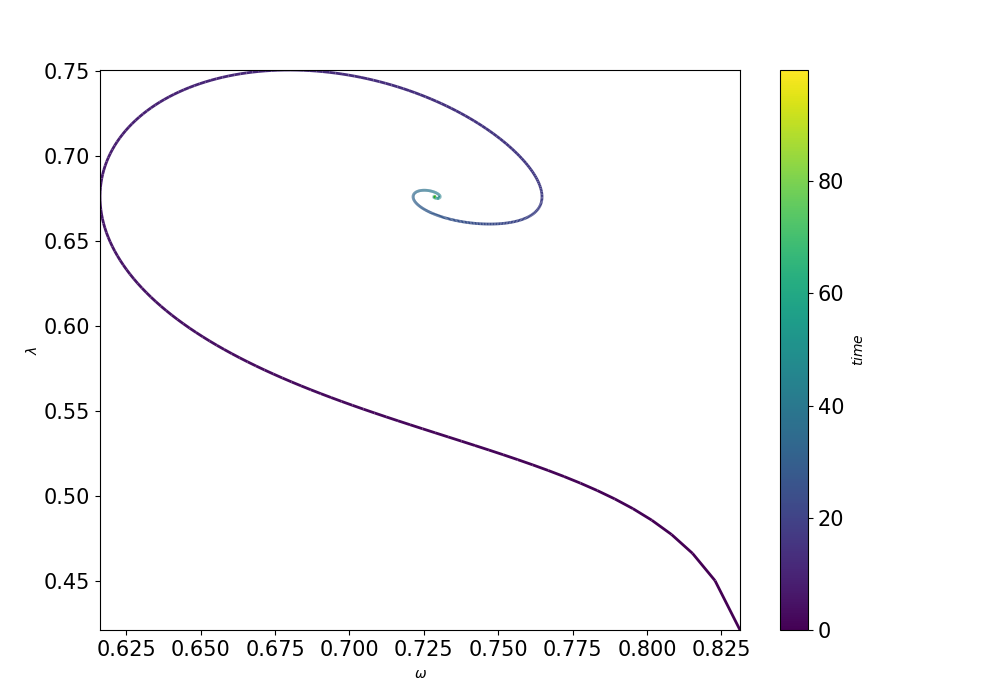

In [58]:
hub=pgm.Hub('CHIMES0',verb=False)
hub.set_dparam(**GOODWIN_PRESET,verb=False)
hub.set_dparam(**{'CESexp':10,'w0':.89})
hub.run()


import matplotlib.pyplot as plt
plt.close('all')
pgm.plots.plotbyunits(hub,filters_key=['employment','omega','gamma','xi','rd','pi',
                      'C','Ir','Y','GammaY','dotV','l','nu','omegacarac'],
                      separate_variables={'':'nu'}) #
pgm.plots.XY(hub,'omega','employment',color='time')

## Getting into GOODWIN-KEEN 

$C:=Y(1-\Gamma)-I $

$C=Y(1-\Gamma- \kappa(\pi) - \xi)$

On Goodwin-Keen approach.

With Ponderation of income : 
$C= C^{pond}(wL/p)$

$C= C^{pond} Y \omega$

Having both induces : $C^{pond} =\dfrac{1- \kappa(\pi) - \xi-\Gamma}{ \omega}$


In [ ]:
hub=pgm.Hub('CHIMES0',verb=False)
hub.set_dparam(**GOODWIN_PRESET,verb=False)
hub.set_dparam(**{'k0':-0.1,'k1':2,'Tmax':300,'dt':0.1})
hub.run()


In [ ]:
hub.plot(filters_key=['employment','omega','gamma','xi','rd','pi','kappa','rd',
                      'C','Ir','Y','GammaY','dotV','p','c','inflation','mu','Phillips','D','Cpond','dotV'],
         separate_variables={'':['Cpond','kappa','pi']}) 
pgm.plots.XYZ(hub,'omega','employment','rd',color='time')

In [2]:
hub=pgm.Hub('reduced_GK_FRED',preset='FredValues')
hub.set_dparam(**{'Tmax':100,
                  'dt'  :0.1,
                  'Delta':0})
phasepace = { 
           'employment': {'mu': 0.75,
                          'sigma': 1,
                          'type': 'uniform'},
            'omega': {'mu': 0.75,
                      'sigma': 1,
                      'type': 'uniform'},
            'debt': {'mu': -2,
                     'sigma': 2,
                     'type': 'uniform'},}


                     
pre2 = pgm.generate_dic_distribution(phasepace,
                     N=50)
hub.set_dparam(**pre2,verb=False)


hub.run()

#pgm.plots.XYZ(hub,'omega','employment','debt',color='time')
#pgm.plots.plotbyunits(hub,filters_key=['employment','omega','debt'])

The following fields are defined in the model but not it the library :
	- differential: ['debt']
	- parameter: ['rho']
The following fields are identified as parameters :
	- independant : ['alpha', 'nu', 'delta', 'r', 'Delta', 'n', 'k0', 'k1', 'gamma']
	- function of other parameters : []
The following variables are identified as auxilliary :
	 - differential : ['time']
	 - state variable : []
The following order has been determined for functions:
	- parameter: ['nt']
	- statevar: ['beta', 'pi', 'kappa', 'Phillips']
	- differential: ['omega', 'employment', 'debt', 'time']

Changing Fields: ['Delta']
Changes Ignored:['Tmax', 'dt']
Identified Delta as a value change on all axes

time step 1000 / 1000


# Multisectorality

The following fields are defined in the model but not it the library :
	- statevar: ['GammaY', 'Idelta', 'Ilever', 'Yc', 'Lc']
	- parameter: ['apond']
The following fields are identified as parameters :
	- independant : ['delta', 'z', 'eta', 'mu0', 'chi', 'Cpond', 'Delta', 'philinConst', 'philinSlope', 'k0', 'k1', 'A']
	- function of other parameters : []
The following variables are identified as auxilliary :
	 - differential : ['V', 'time']
	 - state variable : ['a', 'ROC', 'Kdelta', 'GammaY', 'Minter', 'Minvest', 'Shareholding', 'rDh', 'g', 'reldotv', 'reloverinvest']
The following order has been determined for functions:
	- parameter: ['nt']
	- statevar: ['w', 'a', 'Mgamma', 'Kdelta', 'rD', 'rDh', 'Yc', 'Lc', 'gamma', 'omegacarac', 'l', 'L', 'Y', 'GammaY', 'Minter', 'MtransactY', 'wL', 'W', 'employment', 'nu', 'omega', 'rd', 'Mxi', 'C', 'pC', 'employmentAGG', 'Phillips', 'xi', 'pi', 'ROC', 'c', 'mu', 'inflationMarkup', 'basket', 'Shareholding', 'Idelta', 'kappa', 'reloverinvest', 'I

C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\Core\_model_CHIMES0.py:122: RuntimeWarning: overflow encountered in multiply
  'MtransactI'    :{'func': lambda I, Xi, p: I * Xi * O.transpose(p) / (O.matmul(Xi, p))},
C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\Core\_model_CHIMES0.py:126: RuntimeWarning: invalid value encountered in multiply
  'Shareholding'  :{'func': lambda Delta,p,Y,pi: Delta*p*Y*pi },
C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\Core\_model_CHIMES0.py:152: RuntimeWarning: invalid value encountered in subtract
  'reloverinvest' :{'func': lambda kappa, pi: pi - kappa}, #'com': 'difference between kappa and pi',
C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\Core\_model_CHIMES0.py:120: RuntimeWarning: invalid value encountered in multiply
  'Minvest'       :{'func': lambda Ir, Xi:  O.transpose(Xi* Ir)},
C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\Core\_model_CHIMES0.py:122: RuntimeWarning: invalid value encountered in multiply
  'Mtransac

time step 488 / 500
time step 500 / 500
10


C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\_plots\_plots.py:206: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


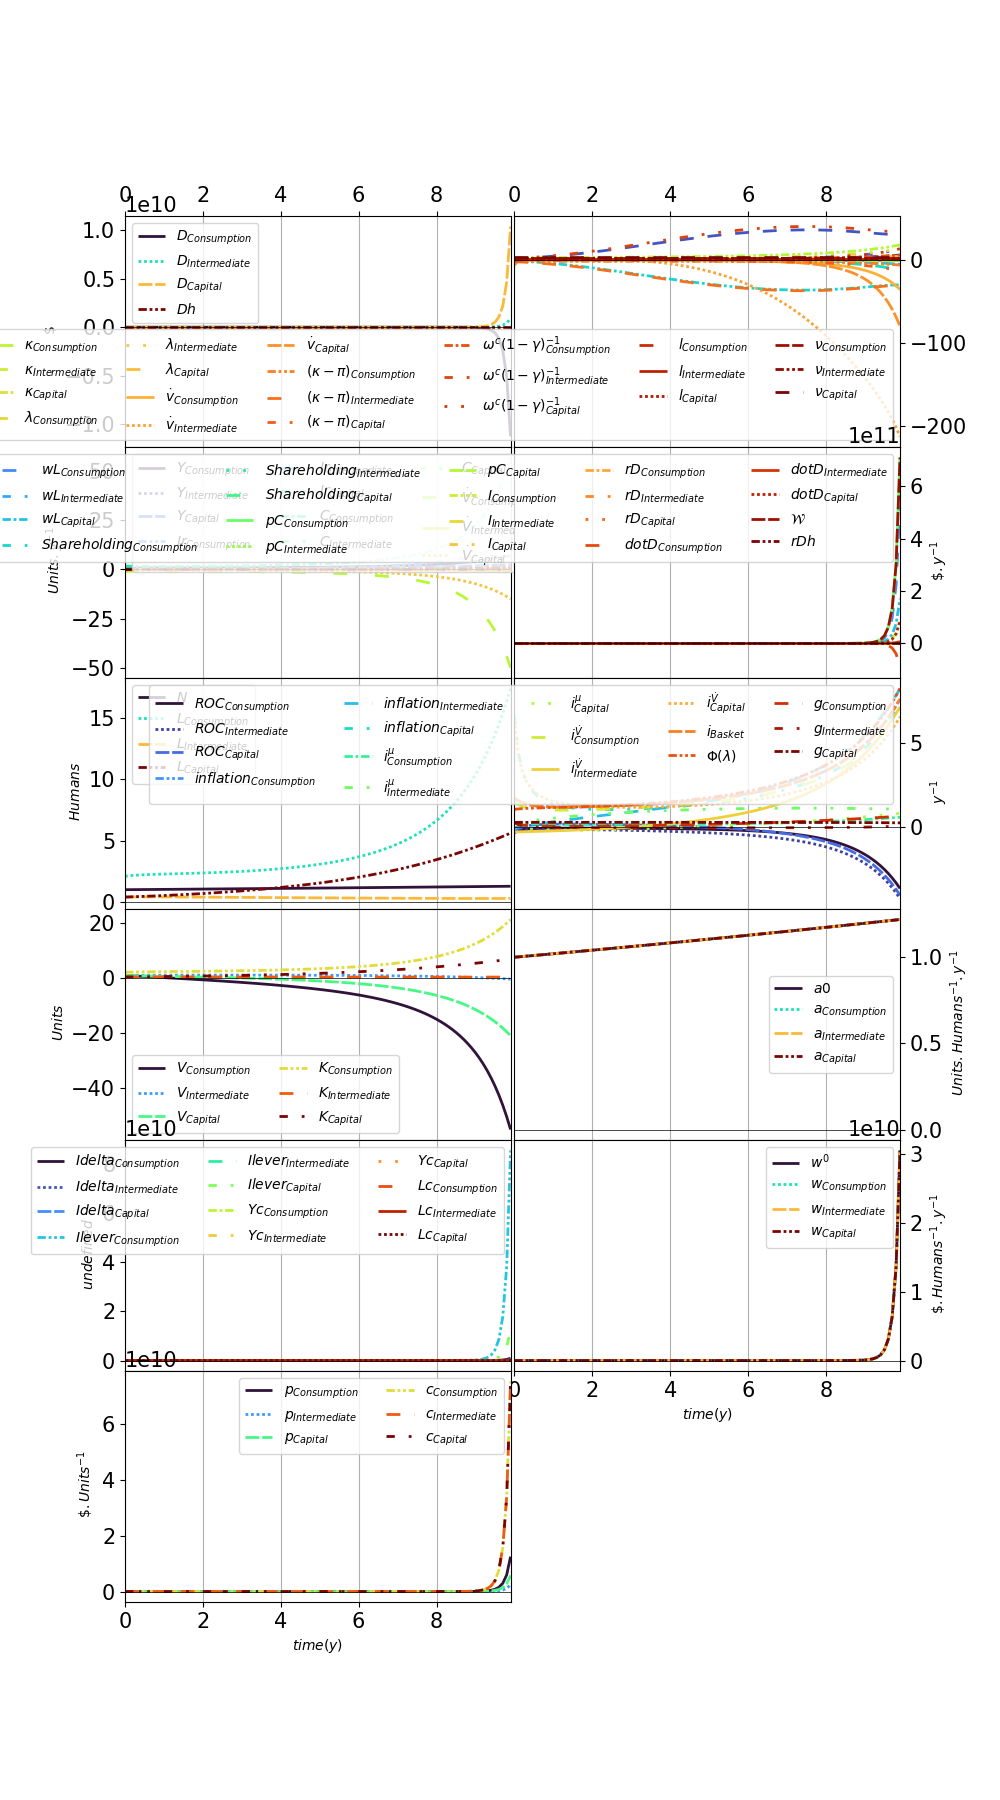

In [67]:
hub=pgm.Hub('CHIMES0',preset='SimpleTri')
hub.run()
hub.plot(tend=10)

In [ ]:
sectors = hub.dparam['Nprod']['list']
for sector in sectors :
    pgm.plots.plotnyaxis(hub, y=[[['inflation', sector],
                                  ['inflationMarkup', sector],
                                  ['inflationdotV', sector], ],
                                 [['dotV',sector]],
                                 [['c',sector],
                                  ['p',sector]],
                                 [['pi',sector],
                                  ['kappa',sector]],
                                 [['employment',sector],
                                  #['u',sector],
                                  ]],
                                  tini=0,
                                  tend=10)
'''
    pgm.plots.repartition(hub,
                          ['pi','omega','Mxi','Mgamma','rd','reloverinvest','reldotv'],
                          sign= [1,1,1,1,1,1,-1],
                          sector=sector,
                          title=f'Expected relative budget $\pi$ for sector {sector}',
                                  tini=0,
                                  tend=10)
    pgm.plots.repartition(hub,['Minter','Minvest','C','dotV'],
                          ref='Y',
                          sector=sector,
                          title=f'Physical Fluxes for sector {sector}',
                                  tini=0,
                                  tend=10)
    pgm.plots.repartition(hub,['MtransactY','MtransactI','wL','pC','rD'],
                          sign=[1, 1, 1, -1, 1],
                          ref='dotD',
                          sector=sector,
                          title=f'Monetary Fluxes for sector {sector}',
                          removetranspose=True,
                                  tini=0,
                                  tend=10)
'''